In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import imblearn
warnings.filterwarnings('ignore')

%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.utils import resample

In [2]:
df = pd.read_csv("./Datasets/df_ohgender.csv",index_col="Unnamed: 0")
df.head()

,age,dependents,occupation,customer_nw_category,current_balance,current_month_credit,previous_month_credit,churn,gender_Female,gender_Male
0,66,0,2,1,1458.71,0.20,0.20,0,0,1
1,35,0,2,1,5390.37,0.56,0.56,0,0,1
2,31,0,1,1,3913.16,0.61,0.61,0,0,1
3,90,0,2,1,2291.91,0.47,0.47,1,0,1
4,42,1,2,0,927.72,0.33,714.61,1,0,1


In [3]:
df["churn"].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

In [4]:
pd.crosstab(index=df["churn"],columns="%",normalize=True)

col_0,%
churn,
0,0.814671
1,0.185329


In [5]:
x = df.drop(columns=["churn"])
y = df["churn"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,stratify=y,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22705, 9), (5677, 9), (22705,), (5677,))

## HANDLING IMBALACE DATA --- SMOTE
    Salah satu cara yang paling mundah untuk memperbaiki data yang tidak seimbang adalah dengan membuat data tersebut menjadi seimbang adalah Oversampling pada minority kelas atau Undersampling pada majority class. Dengan metode Over/under sampling dengan mudah dapat membaut data-set menjadi seimbang tetapi metode ini mempunyai kelemahan, Ovesampling pada data-set minority akan menuju model yang overfitting, karena Oversampling dilakukan dengan duplikasi data yang sudah mempunyai nilai yang sudah kecil, Undersampling pada majority juga dapat mengakibat data yang penting pembeda dua kelas menjadi diluar dari data-set.
<br>

    Metode Synthetic Minority Over-samplingTechnique (SMOTE) merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara membuat instance baru dari minority class dengan pembentukan convex kombanasi dari instances yang saling berdekatan. Dengan metode ini dapat membuat data-set menjadi seimbang tanpa terlalu overfit, yaitu dengan membuat sample synthetic daripada dengan melakukan duplicate sample.

In [6]:
sm = SMOTE(random_state=42)
x_train,y_train = sm.fit_sample(x_train,y_train)
x_train.shape,y_train.shape

((36994, 9), (36994,))

## BASE MODEL UNTUK MACHINE LEARNING :
    1. Logistic Regression
    2. Random Forest
    3. Extreme Gradient Boosting (XGBOOST)

## LOGISTIC REGRESSION

In [7]:
LR = LogisticRegression()

In [8]:
LR.fit(x_train,y_train)

LogisticRegression()

In [9]:
y_LR_train = LR.predict(x_train)
y_LR_test = LR.predict(x_test)

In [10]:
accuracy_LR_train = accuracy_score(y_train,y_LR_train)
precision_LR_train = precision_score(y_train,y_LR_train)
recall_LR_train = recall_score(y_train,y_LR_train)
f1_LR_train = f1_score(y_train,y_LR_train)

accuracy_LR_test = accuracy_score(y_test,y_LR_test)
precision_LR_test = precision_score(y_test,y_LR_test)
recall_LR_test = recall_score(y_test,y_LR_test)
f1_LR_test = f1_score(y_test,y_LR_test)

In [11]:
print("EVALUATION MATRIX LOGISTIC REGRESSION :")
print("Accuracy = ",accuracy_LR_train," VS ",accuracy_LR_test)
print("Precision = ",precision_LR_train," VS ",precision_LR_test)
print("Recall = ",recall_LR_train," VS ",recall_LR_test)
print("F1_Score = ",f1_LR_train," VS ",f1_LR_test)

EVALUATION MATRIX LOGISTIC REGRESSION :
Accuracy =  0.5998810617938044  VS  0.8051787916152897
Precision =  0.762317194377396  VS  0.4623955431754875
Recall =  0.2902632859382603  VS  0.3155893536121673
F1_Score =  0.4204385277995302  VS  0.37514124293785306


In [12]:
cm_LR = confusion_matrix(y_test,y_LR_test,labels=[1,0])
df_cm_LR = pd.DataFrame(data=cm_LR,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_LR

,Pred_1,Pred_0
Aktual_1,332,720
Aktual_0,386,4239


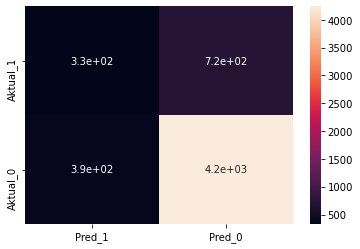

In [13]:
sns.heatmap(df_cm_LR,annot=True)

### LOGREG SCALED

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [15]:
LR_Scaled = LogisticRegression()

In [16]:
LR_Scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [17]:
y_LR_train_scaled = LR_Scaled.predict(x_train_scaled)
y_LR_test_scaled = LR_Scaled.predict(x_test_scaled)

In [18]:
accuracy_LR_train_scaled = accuracy_score(y_train,y_LR_train_scaled)
precision_LR_train_scaled = precision_score(y_train,y_LR_train_scaled)
recall_LR_train_scaled = recall_score(y_train,y_LR_train_scaled)
f1_LR_train_scaled = f1_score(y_train,y_LR_train_scaled)

accuracy_LR_test_scaled = accuracy_score(y_test,y_LR_test_scaled)
precision_LR_test_scaled = precision_score(y_test,y_LR_test_scaled)
recall_LR_test_scaled = recall_score(y_test,y_LR_test_scaled)
f1_LR_test_scaled = f1_score(y_test,y_LR_test_scaled)

In [19]:
print("EVALUATION MATRIX KNN SCALED :")
print("Accuracy = ",accuracy_LR_train_scaled," VS ",accuracy_LR_test_scaled)
print("Precision = ",precision_LR_train_scaled," VS ",precision_LR_test_scaled)
print("Recall = ",recall_LR_train_scaled," VS ",recall_LR_test_scaled)
print("F1_Score = ",f1_LR_train_scaled," VS ",f1_LR_test_scaled)

EVALUATION MATRIX KNN SCALED :
Accuracy =  0.6986268043466508  VS  0.20574246961423287
Precision =  0.8443298969072165  VS  0.1873756556339302
Recall =  0.4870519543709791  VS  0.9847908745247148
F1_Score =  0.6177529399664003  VS  0.3148457681203464


In [20]:
cm_LR_scaled = confusion_matrix(y_test,y_LR_test_scaled,labels=[1,0])
df_cm_LR_scaled = pd.DataFrame(data=cm_LR_scaled,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_LR_scaled

,Pred_1,Pred_0
Aktual_1,1036,16
Aktual_0,4493,132


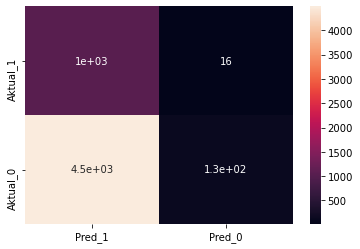

In [21]:
sns.heatmap(df_cm_LR_scaled,annot=True)

### RANDOM FOREST

In [22]:
RF = RandomForestClassifier()

In [23]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_RF_train = RF.predict(x_train)
y_RF_test = RF.predict(x_test)

In [25]:
accuracy_RF_train = accuracy_score(y_train,y_RF_train)
precision_RF_train= precision_score(y_train,y_RF_train)
recall_RF_train = recall_score(y_train,y_RF_train)
f1_RF_train = f1_score(y_train,y_RF_train)

accuracy_RF_test = accuracy_score(y_test,y_RF_test)
precision_RF_test= precision_score(y_test,y_RF_test)
recall_RF_test = recall_score(y_test,y_RF_test)
f1_RF_test = f1_score(y_test,y_RF_test)

In [26]:
print("EVALUATION MATRIX RANDOM FOREST :")
print("Accuracy = ",accuracy_RF_train," VS ",accuracy_RF_test)
print("Precision = ",precision_RF_train," VS ",precision_RF_test)
print("Recall = ",recall_RF_train," VS ",recall_RF_test)
print("F1_Score = ",f1_RF_train," VS ",f1_RF_test)

EVALUATION MATRIX RANDOM FOREST :
Accuracy =  1.0  VS  0.8205037872115554
Precision =  1.0  VS  0.5193434935521688
Recall =  1.0  VS  0.4211026615969582
F1_Score =  1.0  VS  0.46509186351706033


In [27]:
cm_RF = confusion_matrix(y_test,y_RF_test,labels=[1,0])
df_cm_RF = pd.DataFrame(data=cm_RF,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_RF

,Pred_1,Pred_0
Aktual_1,443,609
Aktual_0,410,4215


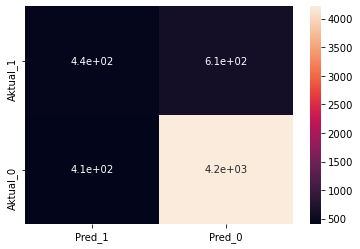

In [28]:
sns.heatmap(df_cm_RF,annot=True)

### XGBOOST

In [29]:
XGB = XGBClassifier()

In [30]:
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
y_XGB_train = XGB.predict(x_train)
y_XGB_test = XGB.predict(x_test)

In [32]:
accuracy_XGB_train = accuracy_score(y_train,y_XGB_train)
precision_XGB_train= precision_score(y_train,y_XGB_train)
recall_XGB_train = recall_score(y_train,y_XGB_train)
f1_XGB_train= f1_score(y_train,y_XGB_train)

accuracy_XGB_test = accuracy_score(y_test,y_XGB_test)
precision_XGB_test= precision_score(y_test,y_XGB_test)
recall_XGB_test = recall_score(y_test,y_XGB_test)
f1_XGB_test = f1_score(y_test,y_XGB_test)

In [33]:
print("EVALUATION MATRIX EXTREME GRADIENT BOOSTING :")
print("Accuracy = ",accuracy_XGB_train," VS ",accuracy_XGB_test)
print("Precision = ",precision_XGB_train," VS ",precision_XGB_test)
print("Recall = ",recall_XGB_train," VS ",recall_XGB_test)
print("F1_Score = ",f1_XGB_train," VS ",f1_XGB_test)

EVALUATION MATRIX EXTREME GRADIENT BOOSTING :
Accuracy =  0.9023084824566145  VS  0.83019200281839
Precision =  0.9456788644666707  VS  0.5540540540540541
Recall =  0.8536519435584149  VS  0.42870722433460073
F1_Score =  0.8973120418253111  VS  0.4833869239013933


In [34]:
cm_XGB = confusion_matrix(y_test,y_XGB_test,labels=[1,0])
df_cm_XGB = pd.DataFrame(data=cm_XGB,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_XGB

,Pred_1,Pred_0
Aktual_1,451,601
Aktual_0,363,4262


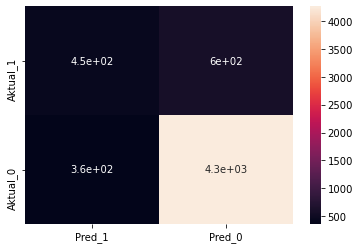

In [35]:
sns.heatmap(df_cm_XGB,annot=True)

## SUPPORT VECTOR MACHINE

In [36]:
SVM = SVC()

In [37]:
SVM.fit(x_train,y_train)

SVC()

In [38]:
y_SVM_train = SVM.predict(x_train)
y_SVM_test = SVM.predict(x_test)

In [39]:
accuracy_SVM_train = accuracy_score(y_train,y_SVM_train)
precision_SVM_train= precision_score(y_train,y_SVM_train)
recall_SVM_train = recall_score(y_train,y_SVM_train)
f1_SVM_train= f1_score(y_train,y_SVM_train)

accuracy_SVM_test = accuracy_score(y_test,y_SVM_test)
precision_SVM_test= precision_score(y_test,y_SVM_test)
recall_SVM_test = recall_score(y_test,y_SVM_test)
f1_SVM_test = f1_score(y_test,y_SVM_test)

In [40]:
print("EVALUATION MATRIX SVM :")
print("Accuracy = ",accuracy_SVM_train," VS ",accuracy_SVM_test)
print("Precision = ",precision_SVM_train," VS ",precision_SVM_test)
print("Recall = ",recall_SVM_train," VS ",recall_SVM_test)
print("F1_Score = ",f1_SVM_train," VS ",f1_SVM_test)

EVALUATION MATRIX SVM :
Accuracy =  0.5846623776828674  VS  0.4449533204157125
Precision =  0.5573164482834346  VS  0.2270481144343303
Recall =  0.8232145753365411  VS  0.8298479087452472
F1_Score =  0.664658766014099  VS  0.3565448233612416


In [41]:
cm_SVM = confusion_matrix(y_test,y_SVM_test,labels=[1,0])
df_cm_SVM= pd.DataFrame(data=cm_SVM,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_SVM

,Pred_1,Pred_0
Aktual_1,873,179
Aktual_0,2972,1653


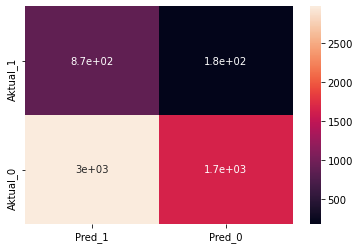

In [42]:
sns.heatmap(df_cm_SVM,annot=True)

# SVM SCALED

In [43]:
scaler_svm = StandardScaler()
x_train_svm = scaler_svm.fit_transform(x_train)
x_test_svm = scaler_svm.fit_transform(x_test)

In [44]:
SVM_scaled = SVC()

In [45]:
SVM_scaled.fit(x_train_svm,y_train)

SVC()

In [46]:
y_SVM_train_scaled = SVM.predict(x_train_svm)
y_SVM_test_scaled = SVM.predict(x_test_svm)

In [47]:
accuracy_SVM_train_scaled = accuracy_score(y_train,y_SVM_train)
precision_SVM_train_scaled= precision_score(y_train,y_SVM_train)
recall_SVM_train_scaled = recall_score(y_train,y_SVM_train)
f1_SVM_train_scaled= f1_score(y_train,y_SVM_train)

accuracy_SVM_test_scaled = accuracy_score(y_test,y_SVM_test)
precision_SVM_test_scaled= precision_score(y_test,y_SVM_test)
recall_SVM_test_scaled = recall_score(y_test,y_SVM_test)
f1_SVM_test_scaled = f1_score(y_test,y_SVM_test)

In [48]:
print("EVALUATION MATRIX SVM Scaled:")
print("Accuracy = ",accuracy_SVM_train_scaled," VS ",accuracy_SVM_test_scaled)
print("Precision = ",precision_SVM_train_scaled," VS ",precision_SVM_test_scaled)
print("Recall = ",recall_SVM_train_scaled," VS ",recall_SVM_test_scaled)
print("F1_Score = ",f1_SVM_train_scaled," VS ",f1_SVM_test_scaled)

EVALUATION MATRIX SVM Scaled:
Accuracy =  0.5846623776828674  VS  0.4449533204157125
Precision =  0.5573164482834346  VS  0.2270481144343303
Recall =  0.8232145753365411  VS  0.8298479087452472
F1_Score =  0.664658766014099  VS  0.3565448233612416


In [49]:
cm_SVM_scaled = confusion_matrix(y_test,y_SVM_test_scaled,labels=[1,0])
df_cm_SVM_scaled= pd.DataFrame(data=cm_SVM_scaled,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_SVM_scaled

,Pred_1,Pred_0
Aktual_1,1052,0
Aktual_0,4625,0


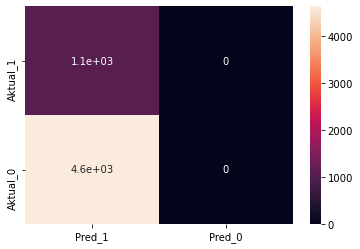

In [50]:
sns.heatmap(df_cm_SVM_scaled,annot=True)

## ============== HYPER PARAMETER TUNING ==================

### SVM TUNED

In [51]:
SVM_Tuned = SVC()

In [52]:
parameter_SVM = {
    "C" : [200], #float
    "kernel" : ["rbf"], # linear,poly,rbf,sigmoid,precomputed
    "degree" : [3], # int (degree of poly)
    "gamma" : ["scale"], #scale , auto
    "coef0" : [0.1], #float
    "tol" : [0.001], #float
    "probability" : [False], #bool
    "cache_size" : [200],
    "class_weight": ["balanced"], #"balanced"
    "max_iter" : [2], # int, -1 ==> no limit
    "decision_function_shape" : ["ovr"] # ovo/ovr
}

In [53]:
model_SVM_Tuned = GridSearchCV(estimator = SVM_Tuned,
                       param_grid= parameter_SVM,
                       cv = 5,
                       n_jobs = -1,
                       verbose=1)

In [54]:
model_SVM_Tuned.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [200], 'cache_size': [200],
                         'class_weight': ['balanced'], 'coef0': [0.1],
                         'decision_function_shape': ['ovr'], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [2],
                         'probability': [False], 'tol': [0.001]},
             verbose=1)

In [55]:
model_SVM_Tuned.best_estimator_

SVC(C=200, class_weight='balanced', coef0=0.1, max_iter=2)

In [56]:
SVM_Tuned = model_SVM_Tuned.best_estimator_

In [57]:
y_SVM_Tuned_train = SVM_Tuned.predict(x_train)
y_SVM_Tuned_test = SVM_Tuned.predict(x_test)

In [58]:
accuracy_SVM_Tuned_train = accuracy_score(y_train,y_SVM_Tuned_train)
precision_SVM_Tuned_train= precision_score(y_train,y_SVM_Tuned_train)
recall_SVM_Tuned_train = recall_score(y_train,y_SVM_Tuned_train)
f1_SVM_Tuned_train = f1_score(y_train,y_SVM_Tuned_train)

accuracy_SVM_Tuned_test = accuracy_score(y_test,y_SVM_Tuned_test)
precision_SVM_Tuned_test= precision_score(y_test,y_SVM_Tuned_test)
recall_SVM_Tuned_test = recall_score(y_test,y_SVM_Tuned_test)
f1_SVM_Tuned_test = f1_score(y_test,y_SVM_Tuned_test)

In [59]:
print("EVALUATION MATRIX LOGREG TUNED:")
print("Accuracy = ",accuracy_SVM_Tuned_train," VS ",accuracy_SVM_Tuned_test)
print("Precision = ",precision_SVM_Tuned_train," VS ",precision_SVM_Tuned_test)
print("Recall = ",recall_SVM_Tuned_train," VS ",recall_SVM_Tuned_test)
print("F1_Score = ",f1_SVM_Tuned_train," VS ",f1_SVM_Tuned_test)

EVALUATION MATRIX LOGREG TUNED:
Accuracy =  0.498269989728064  VS  0.1890082790206095
Precision =  0.4991284453644188  VS  0.18532955350815025
Recall =  0.990755257609342  VS  0.9942965779467681
F1_Score =  0.6638291706663286  VS  0.31242532855436084


In [60]:
cm_SVM_Tuned = confusion_matrix(y_test,y_SVM_Tuned_test,labels=[1,0])
df_cm_SVM_Tuned = pd.DataFrame(data=cm_SVM_Tuned,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_SVM_Tuned

,Pred_1,Pred_0
Aktual_1,1046,6
Aktual_0,4598,27


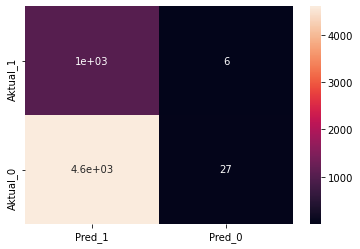

In [61]:
sns.heatmap(df_cm_SVM_Tuned,annot=True)

### LOGREG TUNED

In [62]:
LR_Tuned = LogisticRegression()

In [63]:
parameter_LR ={
    "penalty" : ["l2"],
    "tol" : [5],
    "C" : [1],
    "solver" : ['lbfgs'],
    "max_iter" : [5],
    "class_weight" : ["balanced"],
}

In [64]:
model_LR_Tuned = GridSearchCV(estimator = LR_Tuned,
                       param_grid= parameter_LR,
                       cv = 5,
                       n_jobs = -1,
                       verbose=1)

In [65]:
model_LR_Tuned.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1], 'class_weight': ['balanced'],
                         'max_iter': [5], 'penalty': ['l2'],
                         'solver': ['lbfgs'], 'tol': [5]},
             verbose=1)

In [66]:
model_LR_Tuned.best_estimator_

LogisticRegression(C=1, class_weight='balanced', max_iter=5, tol=5)

In [67]:
LR_Tuned = model_LR_Tuned.best_estimator_

In [68]:
y_LR_Tuned_train = LR_Tuned.predict(x_train_scaled)
y_LR_Tuned_test = LR_Tuned.predict(x_test_scaled)

In [69]:
accuracy_LR_Tuned_train = accuracy_score(y_train,y_LR_Tuned_train)
precision_LR_Tuned_train= precision_score(y_train,y_LR_Tuned_train)
recall_LR_Tuned_train = recall_score(y_train,y_LR_Tuned_train)
f1_LR_Tuned_train = f1_score(y_train,y_LR_Tuned_train)

accuracy_LR_Tuned_test = accuracy_score(y_test,y_LR_Tuned_test)
precision_LR_Tuned_test= precision_score(y_test,y_LR_Tuned_test)
recall_LR_Tuned_test = recall_score(y_test,y_LR_Tuned_test)
f1_LR_Tuned_test = f1_score(y_test,y_LR_Tuned_test)

In [70]:
print("EVALUATION MATRIX LOGREG TUNED:")
print("Accuracy = ",accuracy_LR_Tuned_train," VS ",accuracy_LR_Tuned_test)
print("Precision = ",precision_LR_Tuned_train," VS ",precision_LR_Tuned_test)
print("Recall = ",recall_LR_Tuned_train," VS ",recall_LR_Tuned_test)
print("F1_Score = ",f1_LR_Tuned_train," VS ",f1_LR_Tuned_test)

EVALUATION MATRIX LOGREG TUNED:
Accuracy =  0.7030869870789858  VS  0.31178439316540424
Precision =  0.8286239174175488  VS  0.19530416221985059
Recall =  0.512083040493053  VS  0.8697718631178707
F1_Score =  0.6329858326650628  VS  0.3189820463656964


In [71]:
cm_LR_Tuned = confusion_matrix(y_test,y_LR_Tuned_test,labels=[1,0])
df_cm_LR_Tuned = pd.DataFrame(data=cm_LR_Tuned,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_LR_Tuned

,Pred_1,Pred_0
Aktual_1,915,137
Aktual_0,3770,855


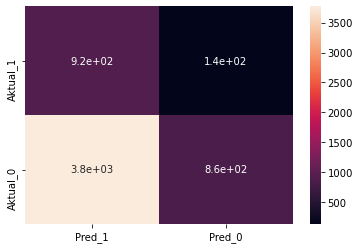

In [72]:
sns.heatmap(df_cm_LR_Tuned,annot=True)

### RANDOM FOREST TUNED

In [73]:
RF_Tuned = RandomForestClassifier()

In [74]:
parameter_RF ={
    "n_estimators" : [2000],
    "max_depth" : [2000],
    "min_samples_split" : [5000],
    "min_samples_leaf" : [2000],
    "max_features" : ["auto"]
}

In [75]:
model_RF_Tuned = GridSearchCV(estimator = RF_Tuned,
                       param_grid= parameter_RF,
                       cv = 5,
                       n_jobs = -1,
                       verbose=1)

In [76]:
model_RF_Tuned.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.4s remaining:   48.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2000], 'max_features': ['auto'],
                         'min_samples_leaf': [2000],
                         'min_samples_split': [5000], 'n_estimators': [2000]},
             verbose=1)

In [77]:
model_RF_Tuned.best_estimator_

RandomForestClassifier(max_depth=2000, min_samples_leaf=2000,
                       min_samples_split=5000, n_estimators=2000)

In [78]:
RF_Tuned = model_RF_Tuned.best_estimator_

In [79]:
y_RF_Tuned_train = RF_Tuned.predict(x_train)
y_RF_Tuned_test = RF_Tuned.predict(x_test)

In [80]:
accuracy_RF_Tuned_train = accuracy_score(y_train,y_RF_Tuned_train)
precision_RF_Tuned_train= precision_score(y_train,y_RF_Tuned_train)
recall_RF_Tuned_train = recall_score(y_train,y_RF_Tuned_train)
f1_RF_Tuned_train = f1_score(y_train,y_RF_Tuned_train)

accuracy_RF_Tuned_test = accuracy_score(y_test,y_RF_Tuned_test)
precision_RF_Tuned_test= precision_score(y_test,y_RF_Tuned_test)
recall_RF_Tuned_test = recall_score(y_test,y_RF_Tuned_test)
f1_RF_Tuned_test = f1_score(y_test,y_RF_Tuned_test)

In [81]:
print("EVALUATION MATRIX RANDOM FOREST TUNED:")
print("Accuracy = ",accuracy_RF_Tuned_train," VS ",accuracy_RF_Tuned_test)
print("Precision = ",precision_RF_Tuned_train," VS ",precision_RF_Tuned_test)
print("Recall = ",recall_RF_Tuned_train," VS ",recall_RF_Tuned_test)
print("F1_Score = ",f1_RF_Tuned_train," VS ",f1_RF_Tuned_test)

EVALUATION MATRIX RANDOM FOREST TUNED:
Accuracy =  0.7888306211818132  VS  0.838999471551876
Precision =  0.8905621755976314  VS  0.5823389021479713
Recall =  0.6585932853976321  VS  0.46387832699619774
F1_Score =  0.7572103431128792  VS  0.5164021164021164


In [82]:
cm_RF_Tuned = confusion_matrix(y_test,y_RF_Tuned_test,labels=[1,0])
df_cm_RF_Tuned = pd.DataFrame(data=cm_RF_Tuned,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_RF_Tuned

,Pred_1,Pred_0
Aktual_1,488,564
Aktual_0,350,4275


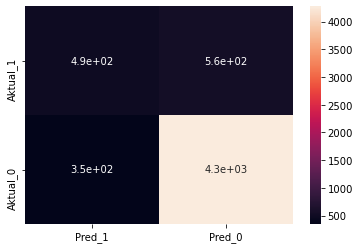

In [83]:
sns.heatmap(df_cm_RF_Tuned,annot=True)

### XGBOOST TUNED

In [84]:
XGB_Tuned = XGBClassifier()

In [85]:
parameter_XGB = {
    "n_estimators" : [15],
    "max_depth" : [1],
    "max_delta_step" : [500],
    "learning_rate" : [0.31],
    "gamma" : [1000],
    "colsample_bytree" : [1],
    "colsample_bynode" : [1],
    "colsample_bylevel" : [1],
    "subsample" : [0.13335],
    "reg_alpha" :[0], 
    "reg_lambda" : [1],
    "num_parallel_tree" : [200],
    "scale_pos_weight" : [1],
    "min_child_weight" : [1],
    "validate_parameters" : [1]
}

In [86]:
model_XGB_Tuned = GridSearchCV(estimator = XGB_Tuned,
                       param_grid= parameter_XGB,
                       cv = 5,
                       n_jobs = -1,
                       verbose=1)

In [87]:
model_XGB_Tuned.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.1s remaining:   39.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.1s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
             n_jobs=-1,
             param_grid={'colsample_bylevel': [1], 'colsample_bynode': [1],
                         'colsample_bytree': [1], 'gamma': [1000],
                         'learning_rate': [0.31], 'max_delta_step': [500],
                         'max_depth': [1]

In [88]:
model_XGB_Tuned.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1000, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.31, max_delta_step=500, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=200, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.13335,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
XGB_Tuned = model_XGB_Tuned.best_estimator_

In [90]:
y_XGB_Tuned_train = XGB_Tuned.predict(x_train)
y_XGB_Tuned_test = XGB_Tuned.predict(x_test)

In [91]:
accuracy_XGB_Tuned_train = accuracy_score(y_train,y_XGB_Tuned_train)
precision_XGB_Tuned_train= precision_score(y_train,y_XGB_Tuned_train)
recall_XGB_Tuned_train = recall_score(y_train,y_XGB_Tuned_train)
f1_XGB_Tuned_train = f1_score(y_train,y_RF_Tuned_train)

accuracy_XGB_Tuned_test = accuracy_score(y_test,y_XGB_Tuned_test)
precision_XGB_Tuned_test= precision_score(y_test,y_XGB_Tuned_test)
recall_XGB_Tuned_test = recall_score(y_test,y_XGB_Tuned_test)
f1_XGB_Tuned_test = f1_score(y_test,y_XGB_Tuned_test)

In [92]:
print("EVALUATION MATRIX EXTREME GRADIENT BOOSTING TUNED:")
print("Accuracy = ",accuracy_XGB_Tuned_train," VS ",accuracy_XGB_Tuned_test)
print("Precision = ",precision_XGB_Tuned_train," VS ",precision_XGB_Tuned_test)
print("Recall = ",recall_XGB_Tuned_train," VS ",recall_XGB_Tuned_test)
print("F1_Score = ",f1_XGB_Tuned_train," VS ",f1_XGB_Tuned_test)

EVALUATION MATRIX EXTREME GRADIENT BOOSTING TUNED:
Accuracy =  0.6937070876358329  VS  0.8354764840584816
Precision =  0.8430677901187285  VS  0.5667420814479638
Recall =  0.4760231388873871  VS  0.4762357414448669
F1_Score =  0.7572103431128792  VS  0.5175619834710744


In [93]:
cm_XGB_Tuned = confusion_matrix(y_test,y_XGB_Tuned_test,labels=[1,0])
df_cm_XGB_Tuned = pd.DataFrame(data=cm_XGB_Tuned,columns=["Pred_1","Pred_0"],index=["Aktual_1","Aktual_0"])
df_cm_XGB_Tuned

,Pred_1,Pred_0
Aktual_1,501,551
Aktual_0,383,4242


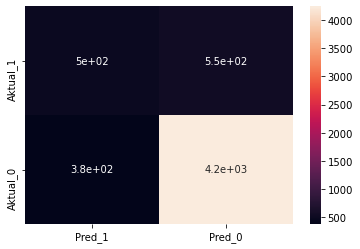

In [94]:
sns.heatmap(df_cm_XGB_Tuned,annot=True)

In [95]:
data= {
    "LOGREG" : [recall_LR_test,f1_LR_test],
    "LOGREG_SCALED" : [recall_LR_test_scaled,f1_LR_test_scaled],
    "Random_Forest" : [recall_RF_test,f1_RF_test],
    "XGBoost" : [recall_XGB_test,f1_XGB_test],
    "SVM" : [recall_SVM_test,f1_SVM_test],
    "SVM_SCALED" : [recall_SVM_test_scaled,f1_SVM_test_scaled],
    "SVM_Tuned" : [recall_SVM_Tuned_test,f1_SVM_Tuned_test],
    "LOGREG_Tuned" : [recall_LR_Tuned_test,f1_LR_Tuned_test],
    "Random_Forest_Tuned" : [recall_RF_Tuned_test,f1_RF_Tuned_test],
    "XGBoost_Tuned" : [recall_XGB_Tuned_test,f1_XGB_Tuned_test]
}
pd.DataFrame(data=data, index=['Recall Score',"F1 Score"]).T

,Recall Score,F1 Score
LOGREG,0.315589,0.375141
LOGREG_SCALED,0.984791,0.314846
Random_Forest,0.421103,0.465092
XGBoost,0.428707,0.483387
SVM,0.829848,0.356545
SVM_SCALED,0.829848,0.356545
SVM_Tuned,0.994297,0.312425
LOGREG_Tuned,0.869772,0.318982
Random_Forest_Tuned,0.463878,0.516402
XGBoost_Tuned,0.476236,0.517562


    MOdel terbaik adalah SVM_Tuned, karena memiliki nilai recall paling tinggi, dan model tidak underfitting maupun overfitting, merupakan pilihan terbaik, karena semua model yang dicoba masih overfitting dan underfitting lumayan tinggi. Selain itu yang menjadi pertimbangan adalah nilai False Negative, karena tujuannya adalah mengurangi jumlah tebakan salag yang dilakukan oleh model (nasabah yang aktualnya akan churn(1) tapi model memprediksi nasabah tersebut non-churn(0)). 

# KESIMPULAN DAN SARAN

## KESIMPULAN
    1. Feature yang memiliki pengaruh dan perlu menjadi perhatian lebih karena dari historical data, memiliki kencenderungan untuk berpindah bank tinggi :
        - Age , Usia kategori dewasa (20-60) tahun, memiliki kecenderungan tinggi dibanding yang lainnya
        - Gender , Male memiliki kecenderungan lebih tinggi untuk berpindah bank
        - Dependets , nasabah yang belum memiliki tanggungan cenderung lebih tinggi kemungkinannya untuk churn.
        - Occupation, apabila nasabah memperolah penghasilan dari kategori (self_employed) kemungkinannya untuk berpindah lebih besar.
        - customer_nw_category, nasabah yang memiliki kekayaan dengan tingkat sedang(1) memiliki kecenderungam lebih tinggi untuk berpindah bank.
        - current_balance, previous_month_balance, average_monthly_balance_prevq2,current_month_credit, previous_month_credit, current_month_debit, previous_month_debit, current_month_balance, semua pada feature ini, kategori "rendah" cenderung untuk berpindah bank.
        - average_monthly_balance_prevq, kategori "cukup_rendah" memiliki kecenderungan paling tinggi untuk berpindah bank dibanding kategori lain.
        - previous_month_balance, kategori "tinggi" memiliki kecenderungan paling tinggi untuk pindah bank.
       
    2. Model terbaik adalah SUPPORT VECTOR MACHINE dengan nilai recall terbaik dan memiliki False Negative paling sedikit.
    


## SARAN

    1. Kemungkinan besar untuk mengurangi jumlah nasabah yang akan keluar adalah dengan meningkatkan servis, meningkatkan mutu produk dan mungkin promo menarik yang dapat ditawarkan kepada pelanggan. TERUTAMA nasabah dengan beberapa feature berikut yang memiliki kecenderungan lebih tingii untuk berpindah bank :
        - Nasabah berusia 20-60 tahun,
        - Nasabah Pria,
        - Nasabah yang belum memiliki tanggungan/hidup untuk dirinya sendiri,
        - Nasabah yang masih self_employed,
        - Nasabah yang memiliki tingkat kekayaan menengah,
        - Nasabah yang memiliki tingkat current_balance, previous_month_balance, average_monthly_balance_prevq2,current_month_credit, previous_month_credit, current_month_debit, previous_month_debit, current_month_balance "rendah",
        - Nasabah yang memiliki tingkat average_monthly_balance_prevq "tinggi", dan
        - Nasabah dengan tingkat previous_month_balance "tinggi".
        
    2. Mungkin bisa di improve lebih lagi mengenai confusion matrix model terbaik (SVM_Tuned), memang sudah memenuhi goals karena memiliki nilai recall yang bagus (tidak overfitting maupun underfitting) dan memiliki nilai False negative (sangat kecil) jadi bisa mengurangi jumlah pengeluaran untuk mencari nasabah baru, karena model dapat memprediksi nasabah yang akan keluar, sehingga dapat dilakukan antisipasi, mungkin berupa penawaran/promo menarik, atau service lebih ditingkatkan.
  
    

# IMPORT MODEL

In [96]:
joblib.dump(SVM_Tuned,"Churn_pred")

['Churn_pred']

In [97]:
df.head()

,age,dependents,occupation,customer_nw_category,current_balance,current_month_credit,previous_month_credit,churn,gender_Female,gender_Male
0,66,0,2,1,1458.71,0.20,0.20,0,0,1
1,35,0,2,1,5390.37,0.56,0.56,0,0,1
2,31,0,1,1,3913.16,0.61,0.61,0,0,1
3,90,0,2,1,2291.91,0.47,0.47,1,0,1
4,42,1,2,0,927.72,0.33,714.61,1,0,1


In [107]:
SVM_Tuned.predict([[66,2,1,1458.71,0.20,0.20,0,1]])

ValueError: X.shape[1] = 8 should be equal to 9, the number of features at training time